In [1]:
import numba as nb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
N = 10 #10 lub 2
L = 100 #nm
mass = 0.067 #au
omega = 10.0 #meV
au_energy = 27211.6
ab = 0.05292 #nm to Bohr radius

n_els = (2*N)**2
n_glob = (2*N+1)**2

x_nlg = np.concatenate([np.linspace(-L/2,L/2,2*N+1) for i in range(2*N+1)])
y_nlg = np.repeat(np.linspace(-L/2,L/2,2*N+1),2*N+1)
nlg = np.empty((n_els,4), dtype = int)
#mesh = np.empty((2*N+1, 2*N+1))     #[i, j] = [y, x]
for k in range(n_els):
    for i in range(2):
        nlg[k,i] = k + i + k//(2*N)
        nlg[k,i+2] = nlg[k,i] + 2*N+1
    

In [3]:
df =pd.DataFrame(index = range(4*n_els),columns = ['Nr elementu', 'Nr lokalny węzła', 'Nr globalny węzła', 'x węzła', 'y węzła'])
for k in range(n_els):
    for i in range(4):
        df.iloc[4*k+i] = [k,i,nlg[k,i],x_nlg[nlg[k,i]],y_nlg[nlg[k,i]]]

In [4]:
#pd.set_option("display.max_rows", None)
pd.reset_option("max_rows")
df

,Nr elementu,Nr lokalny węzła,Nr globalny węzła,x węzła,y węzła
0,0,0,0,-50.0,-50.0
1,0,1,1,-45.0,-50.0
2,0,2,21,-50.0,-45.0
3,0,3,22,-45.0,-45.0
4,1,0,1,-45.0,-50.0
...,...,...,...,...,...
1595,398,3,439,45.0,50.0
1596,399,0,418,45.0,45.0
1597,399,1,419,50.0,45.0
1598,399,2,439,45.0,50.0


In [5]:
def f(i,ksi):
    if i == 0:
        return (1-ksi)/2;
    elif i == 1:
        return (1+ksi)/2;
    else:
        print('[ERROR] Unrecognized function')
        exit(-1)
def g(i,ksi_vec):
    if i == 0:
        return f(0,ksi_vec[0])*f(0,ksi_vec[1])
    elif i == 1:
        return f(1,ksi_vec[0])*f(0,ksi_vec[1]) 
    elif i == 2:
        return f(0,ksi_vec[0])*f(1,ksi_vec[1])
    elif i == 3:
        return f(1,ksi_vec[0])*f(1,ksi_vec[1])
    else:
        print('[ERROR] Unrecognized function')
        exit(-1)
        

In [6]:
Psi_nlg = np.empty(n_glob)
for n in range(n_glob): Psi_nlg[n] = np.exp(-mass*omega/au_energy/2.*((x_nlg[n]/ab)**2+(y_nlg[n]/ab)**2))

In [7]:
ksi_step = 0.1
ksi0_tab = np.arange(-1,1 + ksi_step,ksi_step)
ksi1_tab = np.arange(-1,1 + ksi_step,ksi_step)


x = np.empty((n_els, np.size(ksi0_tab)))  
y = np.empty((n_els, np.size(ksi1_tab)))  
Psi = np.zeros((n_els, np.size(ksi1_tab), np.size(ksi0_tab)))   

for k in range(n_els):
    for m in range (np.size(ksi0_tab)):
        for n in range(np.size(ksi1_tab)):
            x[k,m] = x_nlg[nlg[k,0]]/2*(1-ksi0_tab[m]) + x_nlg[nlg[k,1]]/2*(1+ksi0_tab[m])
            y[k,n] = y_nlg[nlg[k,0]]/2*(1-ksi1_tab[n]) + y_nlg[nlg[k,2]]/2*(1+ksi1_tab[n])
            for i in range(4):
                Psi[k,n,m] += Psi_nlg[nlg[k,i]]*g(i,[ksi0_tab[m], ksi1_tab[n]])  
           
        

In [8]:
for i in range(2*N):
    Psi_new = np.concatenate(Psi[i*2*N:(1+i)*2*N], axis = 1)
    if i == 0:
        Psi_r = Psi_new
    else:
        Psi_r = np.concatenate((Psi_r, Psi_new), axis = 0)
Psi_r = np.delete(Psi_r, [np.size(ksi0_tab)*i for i in range(1,2*N)], axis = 1)
Psi_r = np.delete(Psi_r, [np.size(ksi1_tab)*i for i in range(1,2*N)], axis = 0)

### N = 2

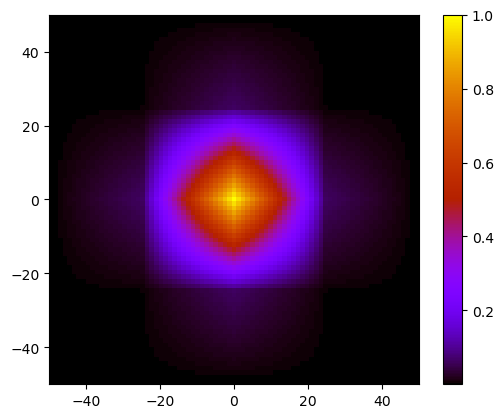

In [9]:
plt.imshow(Psi_r, origin='lower', cmap='gnuplot', extent=[-50,50,-50,50], interpolation=None)
plt.colorbar()

### N = 10

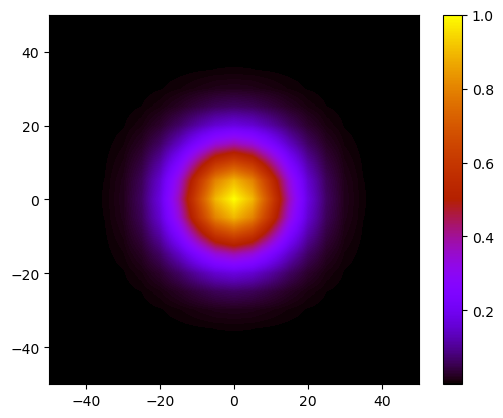

In [9]:
plt.imshow(Psi_r, origin='lower', cmap='gnuplot', extent=[-50,50,-50,50], interpolation=None)
plt.colorbar()